# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     614.6
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           4.18e-37
Time:                        14:05:10   Log-Likelihood:                -7.6352
No. Observations:                  50   AIC:                             23.27
Df Residuals:                      46   BIC:                             30.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1395      0.100     51.308      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.67754539  5.14196914  5.56778166  5.92786127  6.20487434  6.3941232
  6.50431793  6.55614533  6.57887013  6.60552687  6.66749243  6.78933091
  6.98475778  7.25438652  7.58562777  7.95475777  8.33081607  8.6806923
  8.97456603  9.19080627  9.3195253   9.36420326  9.34111632  9.27666261
  9.203025    9.15288364  9.15404663  9.22488126  9.37129631  9.58577127
  9.84859189 10.13108926 10.40034993 10.62462357 10.77853945 10.84727473
 10.82898988 10.73513086 10.58854859 10.41974463 10.26185984 10.14522943
 10.09239898 10.11442027 10.20903548 10.36104817 10.54482    10.72848304
 10.87917556 10.96844116]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.96667954 10.83422112 10.590582   10.28023692  9.96173024  9.69334231
  9.51882036  9.45666766  9.49561329  9.59737164]


## Plot comparison

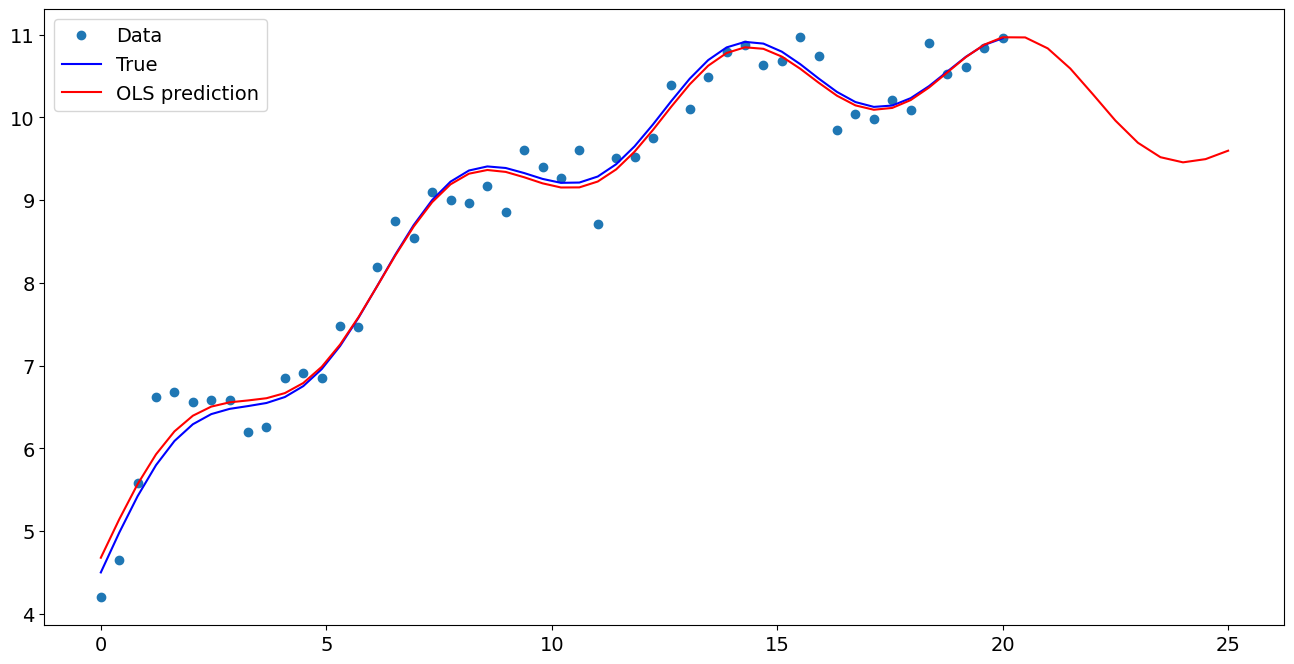

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.139548
x1                  0.476629
np.sin(x1)          0.497654
I((x1 - 5) ** 2)   -0.018480
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.966680
1    10.834221
2    10.590582
3    10.280237
4     9.961730
5     9.693342
6     9.518820
7     9.456668
8     9.495613
9     9.597372
dtype: float64